## Bob Ross example: python

Bob Ross left a long Air Force career to start a painting career and eventually hosted a PBS show called the Joy of Painting, in which Bob paints one landscape per episode in the [wet-on-wet style](https://en.wikipedia.org/wiki/Wet-on-wet). The Joy of Painting ran in the 1980s-90s, but several years ago Twitch streamed all episodes in a marathon. Now you can watch them on youtube, netflix etc.

We're going to use a dataset [jwilber](https://github.com/jwilber/Bob_Ross_Paintings) grabbed from [twoinchbrush](twoinchbrush.com), which has all photos, video and color data for all of the show's paintings.

### A light intro to coding
This is not a coding tutorial, really. It's a demo to get you excited about what you can do with a little bit of coding. It will expose you to the basic method for running code in a Jupyter notebook (this document!) using simple functions that will:

- load the dataset in .csv format (think of this as a spreadsheet) using the [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html) module for python
- view painting names from all seasons
- plot blobs or point clouds with colors used in a painting of your choice, or one that is randomly chosen
- generate summary tables about how often Bob used one color or the other in the Joy of Painting

### python v. R demos
In this demo you will use [python](https://www.python.org/), one of the most flexible and popular open-source coding languages---from app development, to scientific computing.

This demo also has a version in R, another open-source language for scientific and statistical computing.

You'll see hardly any difference between the two versions! They are meant to work similarly. If you decide to follow the 'next_bobross' demos, these R/python starters and the module they load give you code to refer back to as you figure out which language(s) you like to use.

## Part 1: Avert your eyes!
This code chunk has all functions you'll need. Don't worry about what it means. It defines the functions we need in the demo and is here for later reference, if you want it. 

### Run then skip ahead to Prt 2.
Run the following section in the notebook by selecting it and pressing Crtl+Enter, or pressing the 'play' icon at the top of this notebook.

In [52]:
import re
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# HELPER FUNCTIONS
pat = re.compile(r"\\r|\\n|[\[\]']")

def get_bobross():
	bob = pd.read_csv("https://raw.githubusercontent.com/littlebuttermilk/ncssm_sessions/master/data/bob_ross_paintings.csv")
	bob = bob.assign(colors = bob.colors.replace(pat, "").str.split(r"\s*,\s*"), 
		color_hex = bob.color_hex.replace(pat, "").str.split(r"\s*,\s*"))

	return bob


def get_help():
	# help file for students who forget usage
  	# either with one argument, bare unquoted function name, to print usage for that fun
  	# or no arguments to print all
	return "TO DO"



# VIEW DATA

def get_colortable():
    ctable = bob.apply(lambda r: pd.Series(r['color_hex']), axis = 1).dropna().iloc[0]
    ctable.index = bob.apply(lambda r: pd.Series(r['colors']), axis = 1).dropna().iloc[0]
    ctable = ctable.rename(None)

	return ctable


def get_painting_names(random = False):
	# TODO: error checks for incorrect type for R/Python confusion
	# return as array rather than pandas series
	if random:
		return np.random.choice(bob.painting_title.array)
		# return bob.painting_title.sample(1).iloc[0]
	else:
		return bob.painting_title.array

def plot_blobs(painting = "Downstream View"):
	# check that bob has been loaded, return informative error

	# Filter & reshape data
	# .loc[...] returns dataframe, .iloc[0] returns first row as named series
	d = bob.loc[bob.painting_title == painting, ['colors', 'color_hex']].iloc[0]
	d = pd.DataFrame({'colors': d['colors'], 'color_hex': d['color_hex']})

	# Generate random point in two dimensional box from -10 to 10
	d = d.assign(x = np.random.uniform(low = -10, high = 10, size = d.shape[0]),
		y = np.random.uniform(low = -10, high = 10, size = d.shape[0]))

	p = d.plot.scatter(x = 'x', y = 'y', s = pd.Series(8000, index = d.colors),
		title = painting,
		alpha = .7, c = d['color_hex'],
		xlim = (-12, 12), ylim = (-12, 12),  
		xticks = None, figsize = (12, 8)) # (width, height) in inches

	for i, r in d.iterrows():
		p.annotate(text = r['colors'], xy = (r['x']-1.25, r['y'])) # no good centering

	# display
	p
	plt.axis('off')
	plt.show()

	return None


def plot_cloud(painting = "Downstream View"):
	# check that bob has been loaded, return informative error

	# Filter & reshape data
	d = bob.loc[bob.painting_title == painting, ['colors', 'color_hex']].iloc[0]
	d = pd.DataFrame({'colors': d['colors'], 'color_hex': d['color_hex']})
	d.colors = d.colors.str.strip()
	d.color_hex = d.color_hex.str.strip()

	# Generate centers of clouds in two dimensional box from -10 to 10
	d = d.assign(x = np.random.uniform(low = -10, high = 10, size = d.shape[0]),
		y = np.random.uniform(low = -10, high = 10, size = d.shape[0]))

	# Create new data frame in chunks of rows
	# with point cloud coordinates and colors, color_hex labels
	d = d.assign(cloud = d.apply(lambda r: np.random.multivariate_normal([r['x'], r['y']], [[1, 0], [0, 1]], 
				size = 100), axis = 1)
				)

	# 'explode' the cloud so we have one row for each 2d random point, 100 for each color
	# replace x, y column values with cloud values, drop cloud, to use familiar syntax from plot_blob
	d = d.explode('cloud').reset_index()
	d[["x", "y"]] = d.cloud.to_list()
	d = d.drop('cloud', axis = 1)


	d.plot.scatter(x = 'x', y = 'y', s = pd.Series(3000, index = d.colors),
		title = painting,
		alpha = .7, c = d['color_hex'],
		xlim = (-12, 12), ylim = (-12, 12),  
		xticks = None, figsize = (12, 8))
	
	plt.axis('off')
	plt.show()

	return None



# SUMMARIZE DATA

def colors_show(color = "all"):
    # for simplicity just one color or all
    # getting list of colors
    ctable = get_colortable()

    if color=="all":
        return bob.loc[:, ctable.index.str.replace(r'\s+', "_")].sum()
    elif not any(ctable.index==color):
        sys.exit('Invalid color argument input. \
            Use "all" to see all colors or one color name (with caps!), e.g. "Dark Sienna",\
            as they appear in the data frame column called "color". \
            Check available colors with get_colortable()')
    else:
        # replacing space with _ to match actual column names
        color = re.sub(r"\s+", "_", color)
        return bob.loc[:, color].sum()

def colors_byseason(color = "all", stat = "total"):
	# getting list of colors
	ctable = get_colortable()

	if color=="all":
		d = pd.concat([bob.loc[:, ctable.index.str.replace(r'\s+', "_")], bob.loc[:, 'season']], 
			axis = 1)
		if stat=="total":
			return d.groupby('season').sum()
		elif stat=="mean":
			return d.groupby('season').mean()
		else:
			sys.exit('Invalid stat argument. Use "total" or "mean", for average number of uses by season.')

	elif not any(ctable.index==color):
		sys.exit('Invalid color argument input. \
				Use "all" to see all colors or one color name (with caps!), e.g. "Dark Sienna",\
				as they appear in the data frame column called "color". \
				Check available colors with get_colortable()')

	else:
		# replacing space with _ to match actual column names
		color = re.sub(r"\s+", "_", color)
		if stat=="total":
			return bob.loc[:, ["season"]+[color]].groupby('season').sum()
		elif stat=="mean":
			return bob.loc[:, ["season"]+[color]].groupby('season').mean()
		else:
			sys.exit('Invalid stat argument. Use "total" or "mean", for average number of uses by season.')

## Part 2: Load the data
Run the following code chunk (select the chunk then press Ctrl+Enter).

**Here you call the bob_ross() function to**

- load the csv file
- into a 'data frame'
- called 'bob', which holds all of the data here

#### What is a data frame?
Think of it as a spreadsheet. It has rows and columns, and each cell holds some data: a word, a number, a list of words.

![](https://pandas.pydata.org/pandas-docs/stable/_images/01_table_dataframe1.svg)

Image source: pandas.pydata.org

In [7]:
bob = get_bobross()

## Part 3: First look at the data

Subsequent functions we run now can access the 'bob' dataset.

How do you know you did anything when the code gives no output?

**Here you run bob.columns to**
- access a list of all column names for bob

**Then you run the function get_painting_names() to**

- print all painting names across all seasons of the Joy of Painting
- in other words, you are printing the column called 'painting_title' in the bob data frame

Since there are a lot of names, the display will only show the first and last several items, with the ellipses '...' in between to remind you there's more in the column than what is shown.

In [9]:
bob.columns

Index(['Unnamed: 0', 'painting_index', 'img_src', 'painting_title', 'season',
       'episode', 'num_colors', 'youtube_src', 'colors', 'color_hex',
       'Black_Gesso', 'Bright_Red', 'Burnt_Umber', 'Cadmium_Yellow',
       'Dark_Sienna', 'Indian_Red', 'Indian_Yellow', 'Liquid_Black',
       'Liquid_Clear', 'Midnight_Black', 'Phthalo_Blue', 'Phthalo_Green',
       'Prussian_Blue', 'Sap_Green', 'Titanium_White', 'Van_Dyke_Brown',
       'Yellow_Ochre', 'Alizarin_Crimson'],
      dtype='object')

In [10]:
get_painting_names()

<PandasArray>
[   'A Walk in the Woods',           'Mt. McKinley',           'Ebony Sunset',
            'Winter Mist',           'Quiet Stream',            'Winter Moon',
        'Autumn Mountain',        'Peaceful Valley',               'Seascape',
          'Mountain Lake',
 ...
       'Tranquility Cove',    'Cabin in the Hollow',  'View from Clear Creek',
       'Bridge to Autumn',            "Trail's End",       'Evergreen Valley',
            'Balmy Beach',      'Lake at the Ridge', 'In the Midst of Winter',
         'Wilderness Day']
Length: 403, dtype: object

## Part 4: Functions and arguments

A function does something then produces an output. It can take inputs, called arguments, or not. This is a universal concept in all coding languages, mathematics and beyond. We have seen two functions so far that take no inputs: get_bobross() and get_painting_names().

### Arugments and defaults
Many functions can be run with or without inputs (aka arguments). If you do not specify what an argument's value should be, then the function should use some default value.

The function get_painting_names() in fact has one argument, called random. It tells the function whether to 

- print *all* painting names by specifying `random = True` in the parentheses
- or to *pick a random one* by specifying `random = False`

The default is `random = False`, as you can see from the fact that get_painting_names(), which specifies no arguments, gave us all names.

**Here you run get_painting_names(random = True) to**

- choose a random painting name from all possible values
- run it several times to get different results!

In [14]:
get_painting_names(random = True)

'Marshlands'

## Part 5: Make a plot of the colors used in a painting
Plotting data is a great way to look at it. 

Our dataset has the colors Bob used for each painting, so let's check it out!

**Here you run plot_blobs() to**

- fill in circles with each of the colors used
- in the painting "Downstream View"
- where the circle locations are randomly chosen (run it several times!)
- but the colors are the actual ones Bob used, as specified in our dataset

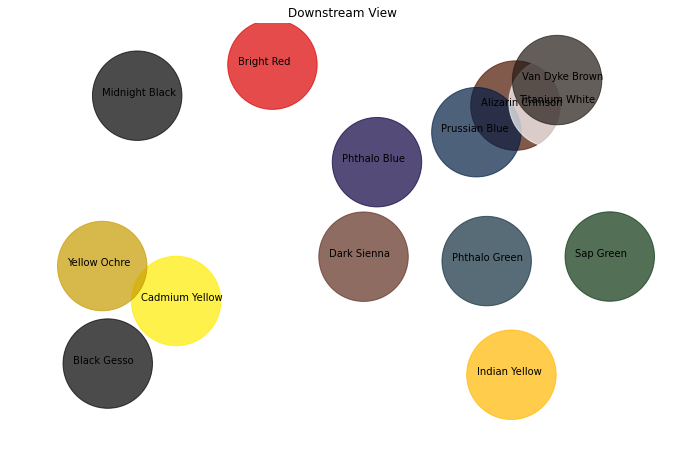

In [27]:
plot_blobs()

### Downstream View, from twoinchbrush.com

![](https://www.twoinchbrush.com/images/painting329.png)

### Blobs for different paintings
plot_blobs takes one argument, the name of the painting whose colors you want to plot. "Downstream View" is the default painting to use if you specify no arguments. Let's change it up.


**Here you run plot_blobs(painting = "Through the Window") to**

- plot color blobs as above, but for the specified painting instead of the default

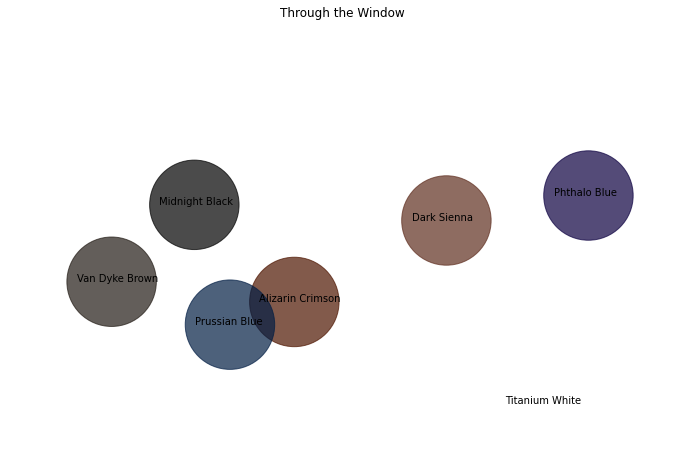

In [28]:
plot_blobs(painting = "Through the Window")

### arguments without the `=`
If there is no confusion about which argument you are trying to specify, you can just put the argument value without the `argument name = argument value` syntax. This makes your code a little more concise and easier to read.

Since plot_blobs has only one argument there is no confusion, and you can run

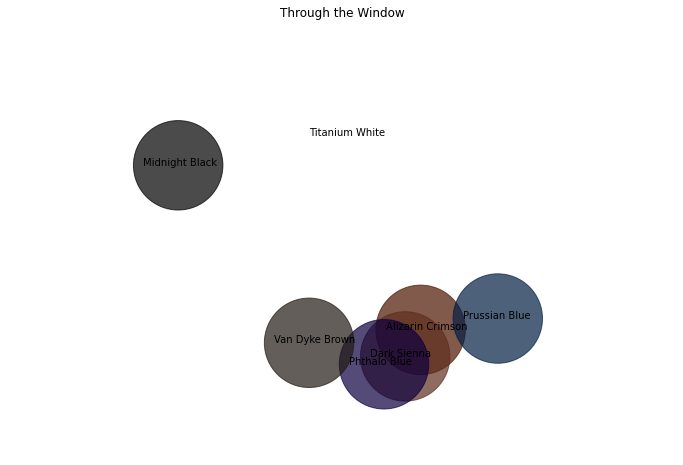

In [29]:
plot_blobs("Through the Window")

### Through the Window

![](https://www.twoinchbrush.com/images/painting392.png)

## Part 6: So much plotting you can do

pandas, and python in general, has a *huge* amount of flexibility in plots you can create from data.  Here, we just *take one small step* away from plotting blobs to plotting point clouds with the plot_cloud function. You use it just like the plot_blobs function.

**Here you run plot_cloud("Through the Window") to**

- generate a random point cloud for each color used in "Through the Window"
- plot it, with the real color value as in plot_blobs

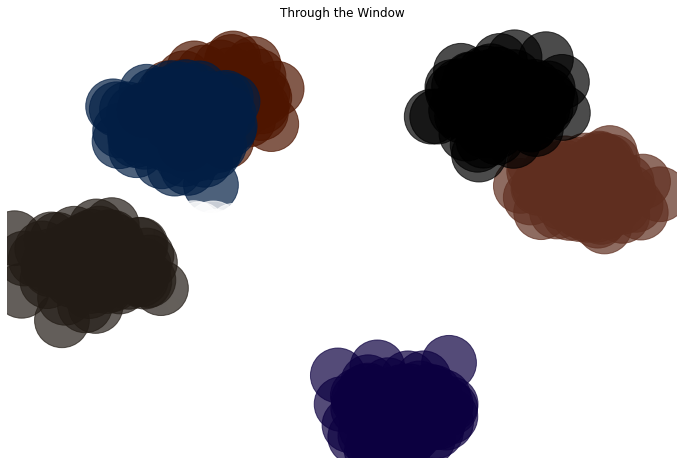

In [30]:
plot_cloud("Through the Window")

## Part 7: Output of one, input of other

Each function has some output, and usually the function *returns* an object that can be used elsewhere in your code.

For example, we saw the get_bobross() function returns a data frame, which we called bob by writing the code `bob = get_bobross()`.

Similarly, we saw `get_painting_names(True)` returns a single painting name in quotations. Since this is exactly the kind of argument our plotting functions need, we can use the output of get_painting_names as the argument in plot_cloud!

**Here you run plot_cloud(get_painting_names(True)) to**

- first randomly choose a painting name (using the statement inside the outermost parentheses)
- and use it as the argument for plot_cloud
- to show color point clouds for a that random painting

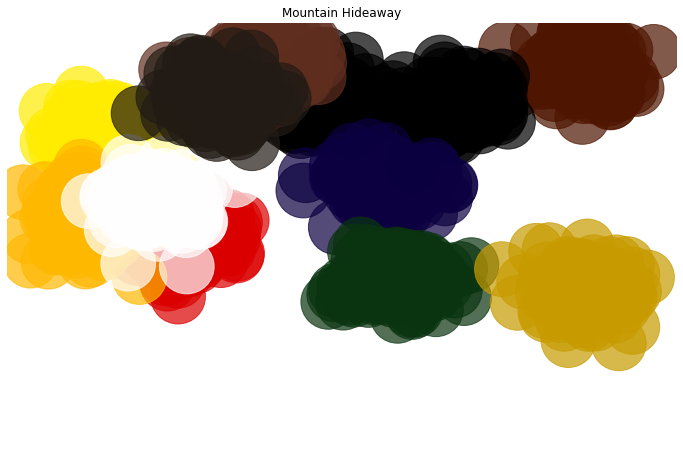

In [32]:
plot_cloud(get_painting_names(True))

### or save the painting name for multiple uses
Using the `=` statement just like with `bob = get_bobross()` we can assign a randomly chosen painting name to an object for later use. Let's call it `rpaint`. This way we can plot blobs and clouds for the same painting. 

**Here you run rpaint = get_painting_names(True) to**

- select a random painting name
- store it as an object called rpaint

**then plot_cloud(rpaint), plot_blobs(rpaint) to**

- show blobs and clouds for the random painting chosen

In [33]:
rpaint = get_painting_names(True)

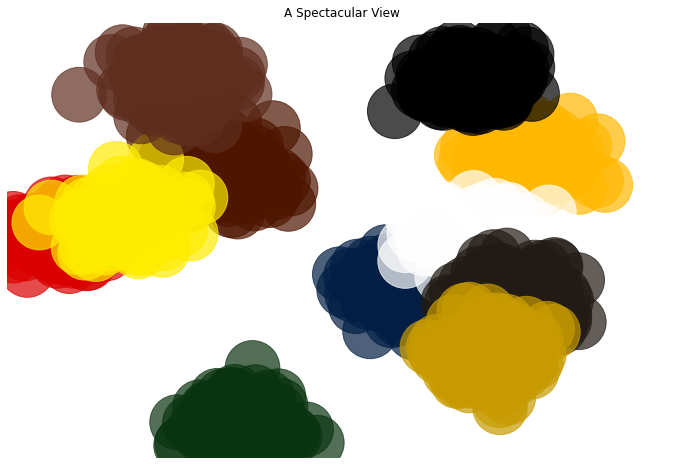

In [34]:
plot_cloud(rpaint)

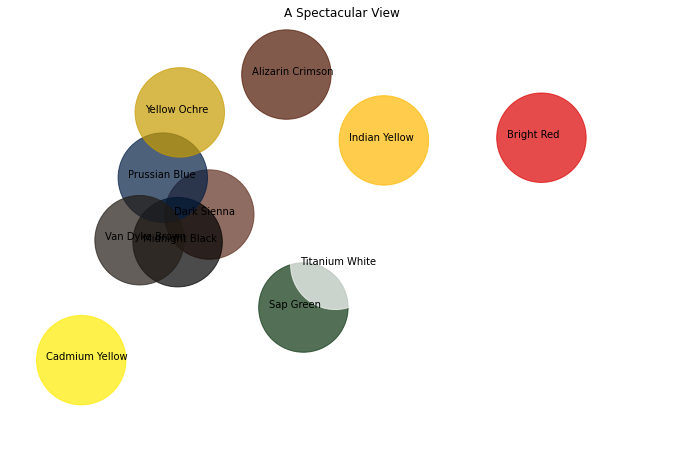

In [35]:
plot_blobs(rpaint)

### Part 8: Summarize the data

Here we will just *dip a toe* into the vast pool of options for summarizing data with pandas in python. This section is not indended to show you *how* to do that, which requires more coding than we can cover, but to give you the idea of what can be done with relatively little experience or work.

We will answer two questions...

#### How many times each season did Bob use a given color?

#### How many times did Bob use a given color, across all seasons?

### How many times each season?

The function colors_byseason by default returns the total number of times Bob used each color, for each television season.

**Here you run colors_byseason() to**

- return a data frame with the number of times Bob used a color, for each color and season

In [37]:
colors_byseason()

,Alizarin_Crimson,Black_Gesso,Bright_Red,Cadmium_Yellow,Dark_Sienna,Indian_Yellow,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre
season,,,,,,,,,,,,,,,
1,11,2,10,10,0,0,0,0,0,10,13,10,13,13,0
2,12,3,11,12,0,9,0,0,12,12,13,12,13,13,12
3,13,2,9,13,0,5,0,1,8,8,9,11,12,13,12
4,12,2,11,12,0,10,0,1,10,7,9,10,13,12,9
5,12,2,7,8,0,10,1,0,10,6,4,9,13,10,7
6,13,3,12,13,0,12,0,0,11,6,5,11,13,13,12
7,10,0,12,10,10,10,0,9,9,4,4,9,13,10,11
8,13,2,13,12,11,12,0,12,11,3,3,8,13,13,12
9,13,3,13,11,13,8,2,13,13,1,4,8,13,13,12


### Too many columns to look at
Looking at big tables can be annoying. Let's look at this information for just *one color*.

The colors_byseason() function as an argument called `color`. Specify a color name to see the output for that color.

**Here you run colors_byseason(color = "Alizarin Crimson") to**

- return a data frame showing the number of times Bob used that color per season

**Important!**

Notice I wrote "Alizarin Crimson", as the color appears in the output of get_painting_names(). Typing "alizarin crimson", "Alizarin_Crimson" or anything else that is not *exactly* a painting name as written in the list will return an error.

This is an important lesson in coding: You need to specify arguments exactly as the function requires them to be. If you wanted to allow variations of the same name, such as "alizarin crimson" or "Alizarin_Crimson", you would need to modify the function to interpret that input correctly!

In [38]:
colors_byseason(color = "Alizarin Crimson")

,Alizarin_Crimson
season,
1,11
2,12
3,13
4,12
5,12
6,13
7,10
8,13
9,13


#### Example of the error from mis-specifying your argument

Whoops... See what went wrong in the `SystemExit` message. This error message written specially for this tutorial. Often python error messages are helpful, but just as often they are not.  They always come with a bunch of information you might not find useful, so learn to look for the relevant bits.

In [40]:
colors_byseason(color = "Alizarin")

SystemExit: Invalid color argument input. 				Use "all" to see all colors or one color name (with caps!), e.g. "Dark Sienna",				as they appear in the data frame column called "color". 				Check available colors with get_colortable()

/home/bb/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### How many times across all seasons?

This one is easier.

**Here you run colors_show() to**

- view the total number of times Bob used a color
- across all seasons

**and colors_show("Black Gesso") to**

- view the total number of times Bob used that color across all seasons

In [56]:
colors_show()

214
Alizarin_Crimson    380
Black_Gesso         101
Bright_Red          321
Cadmium_Yellow      346
Dark_Sienna         290
Indian_Yellow       292
Liquid_Clear         51
Midnight_Black      317
Phthalo_Blue        323
Phthalo_Green       116
Prussian_Blue       263
Sap_Green           306
Titanium_White      400
Van_Dyke_Brown      371
Yellow_Ochre        327
dtype: int64

In [57]:
colors_show("Black Gesso")

101

# An exercise for you

Actually, the function colors_by_season has two arguments! 

- `painting` which can be set equal to "all" (the default) or a specific painting name, as you saw above
- `stat` which can be set to "total" (the default) to give total number of times a painting was used
- or set `stat` to "mean" to give the *average* number of times a painting was used each season

We might want to know the average number of times a painting was used because the number of episodes in each season varies.

**Use the syntax `argument name = argument value` to input two arguments to colors_by_season and show the average number of times a painting was used, or all of them.**

To specify multiple arguments for a function, use a comma between them inside the parentheses. 

## Onto the next step!

See `next_bobross_py.ipynb`.